##### Copyright 2021 The TF-Agents Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# DQN C51/Rainbow

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/agents/tutorials/9_c51_tutorial">
    <img src="https://www.tensorflow.org/images/tf_logo_32px.png" />
    View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/agents/blob/master/docs/tutorials/9_c51_tutorial.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/agents/blob/master/docs/tutorials/9_c51_tutorial.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
    View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/agents/docs/tutorials/9_c51_tutorial.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

## Introduction

This example shows how to train a [Categorical DQN (C51)](https://arxiv.org/pdf/1707.06887.pdf) agent on the Cartpole environment using the TF-Agents library.

![Cartpole environment](https://github.com/tensorflow/agents/blob/master/docs/tutorials/images/cartpole.png?raw=1)

Make sure you take a look through the [DQN tutorial](https://github.com/tensorflow/agents/blob/master/docs/tutorials/1_dqn_tutorial.ipynb) as a prerequisite. This tutorial will assume familiarity with the DQN tutorial; it will mainly focus on the differences between DQN and C51.


## Setup


If you haven't installed tf-agents yet, run:

In [2]:
!sudo apt-get update
!sudo apt-get install -y xvfb ffmpeg freeglut3-dev
!pip install 'imageio==2.4.0'
!pip install pyvirtualdisplay
!pip install tf-agents
!pip install pyglet


0% [Working]


            
Hit:1 http://us-central1.gce.archive.ubuntu.com/ubuntu focal InRelease

0% [Connecting to security.ubuntu.com (185.125.190.39)] [Connecting to ppa.laun
                                                                               
Hit:2 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates InRelease

                                                                               
Hit:3 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-backports InRelease

0% [Connecting to security.ubuntu.com (185.125.190.39)] [Connecting to develope
                                                                               
Hit:4 http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease

0% [Connecting to security.ubuntu.com (185.125.190.39)] [Connecting to ppa.laun
                                                                               
Get:5 https://nvidia.github.io/libnvidia-container/stable/ubuntu18.04/amd64  InRelease [1484 B]

0% 


                                                                               
Hit:6 https://download.docker.com/linux/ubuntu focal InRelease

0% [Connecting to security.ubuntu.com (185.125.190.39)] [Waiting for headers] [
                                                                               
Get:7 https://nvidia.github.io/nvidia-container-runtime/stable/ubuntu18.04/amd64  InRelease [1481 B]

0% [Connecting to security.ubuntu.com (185.125.190.39)] [Waiting for headers] [
                                                                               
Get:8 https://nvidia.github.io/nvidia-docker/ubuntu18.04/amd64  InRelease [1474 B]

0% [Connecting to security.ubuntu.com (185.125.190.39)] [Waiting for headers] [
0% [Connecting to security.ubuntu.com (185.125.190.39)] [Waiting for headers] [


                                                                               
0% [Waiting for headers] [Waiting for headers] [Waiting for headers]
                                                                    
Ign:9 http://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease

                                                                    
0% [Waiting for headers] [Waiting for headers]
                                              
Hit:10 http://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release

0% [Waiting for headers] [Waiting for headers]


0% [Waiting for headers] [Connecting to apt.llvm.org] [Waiting for headers]
                                                                           
Get:11 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]

0% [11 InRelease 12.6 kB/114 kB 11%] [Connecting to apt.llvm.org (199.232.194.4
                                                                               
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease

0% [11 InRelease 12.6 kB/114 kB 11%] [Connecting to apt.llvm.org (199.232.194.4
0% [11 InRelease 12.6 kB/114 kB 11%] [Connecting to ppa.launchpad.net (185.125.


0% [11 InRelease 12.6 kB/114 kB 11%] [Connecting to ppa.launchpad.net (185.125.


                                                                               
0% [11 InRelease 33.2 kB/114 kB 29%] [Waiting for headers]


                                                          
Hit:14 http://ppa.launchpad.net/longsleep/golang-backports/ubuntu focal InRelease

0% [11 InRelease 38.3 kB/114 kB 34%] [Connecting to ppa.launchpad.net (185.125.


0% [Connected to apt.llvm.org (199.232.198.49)] [11 InRelease 55.1 kB/114 kB 48
                                                                               
Hit:13 https://apt.llvm.org/focal llvm-toolchain-focal-14 InRelease

0% [11 InRelease 68.0 kB/114 kB 60%] [Connecting to ppa.launchpad.net (185.125.


                                                                               
0% [11 InRelease 95.0 kB/114 kB 83%] [Waiting for headers]
                                                          
0% [Waiting for headers]


                        
Hit:15 http://ppa.launchpad.net/openjdk-r/ppa/ubuntu focal InRelease

                        
0% [Working]


0% [Working]


0% [Working]


0% [Working]


0% [Working]


0% [Working]


0% [Working]


100% [Working]
              
Fetched 118 kB in 1s (90.3 kB/s)



Reading package lists... 0%

Reading package lists... 0%




Reading package lists... 3%

Reading package lists... 3%

Reading package lists... 5%

Reading package lists... 5%

Reading package lists... 5%

Reading package lists... 5%

Reading package lists... 5%




Reading package lists... 38%




Reading package lists... 55%

Reading package lists... 55%

Reading package lists... 56%

Reading package lists... 56%

Reading package lists... 56%




Reading package lists... 63%




Reading package lists... 67%

Reading package lists... 67%

Reading package lists... 71%

Reading package lists... 71%

Reading package lists... 72%




Reading package lists... 76%

Reading package lists... 76%

Reading package lists... 77%

Reading package lists... 77%

Reading package lists... 77%

Reading package lists... 77%

Reading package lists... 77%

Reading package lists... 77%

Reading package lists... 77%

Reading package lists... 77%

Reading package lists... 77%

Reading package lists... 77%

Reading package lists... 77%

Reading package lists... 77%

Reading package lists... 77%




Reading package lists... 83%

Reading package lists... 83%

Reading package lists... 86%

Reading package lists... 86%

Reading package lists... 88%

Reading package lists... 90%

Reading package lists... 90%

Reading package lists... 91%

Reading package lists... 91%

Reading package lists... 94%

Reading package lists... 94%

Reading package lists... 95%

Reading package lists... 95%

Reading package lists... 95%

Reading package lists... 95%

Reading package lists... 95%

Reading package lists... 95%

Reading package lists... 95%




Reading package lists... 98%

Reading package lists... 98%

Reading package lists... 98%

Reading package lists... 98%

Reading package lists... 98%

Reading package lists... 98%

Reading package lists... 98%

Reading package lists... 98%

Reading package lists... 98%

Reading package lists... 98%

Reading package lists... 98%

Reading package lists... 98%

Reading package lists... 98%

Reading package lists... 98%

Reading package lists... 98%

Reading package lists... 98%

Reading package lists... 98%

Reading package lists... 98%

Reading package lists... 99%

Reading package lists... 99%

Reading package lists... 99%




Reading package lists... 99%




Reading package lists... Done




Reading package lists... 100%

Reading package lists... Done


Building dependency tree... 0%

Building dependency tree... 0%

Building dependency tree... 50%




Building dependency tree       


Reading state information... 0%

Reading state information... 0%

Reading state information... Done

freeglut3-dev is already the newest version (2.8.1-3).


The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libparted-fs-resize0
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  i965-va-driver intel-media-va-driver libaacs0 libaom0 libass9 libavcodec58
  libavdevice58 libavfilter7 libavformat58 libavresample4 libavutil56
  libbdplus0 libbluray2 libbs2b0 libcdio-cdda2 libcdio-paranoia2 libcdio18
  libchromaprint1 libcodec2-0.9 libdc1394-22 libfftw3-double3 libflite1
  libgme0 libgsm1 libigdgmm11 liblilv-0-0 libmysofa1 libopenal-data libopenal1
  libopenmpt0 libpostproc55 librubberband2 libsdl2-2.0-0 libserd-0-0 libshine3
  libsnappy1v5 libsndio7.0 libsord-0-0 libsratom-0-0 libssh-gcrypt-4
  libswresample3 libswscale5 libva-drm2 libva-x11-2 libva2 libvidstab1.1
  libwebpmux3 libx264-155 libx265-179 libxvidcore4 libzvbi-common l

The following NEW packages will be installed:
  ffmpeg i965-va-driver intel-media-va-driver libaacs0 libaom0 libass9
  libavcodec58 libavdevice58 libavfilter7 libavformat58 libavresample4
  libavutil56 libbdplus0 libbluray2 libbs2b0 libcdio-cdda2 libcdio-paranoia2
  libcdio18 libchromaprint1 libcodec2-0.9 libdc1394-22 libfftw3-double3
  libflite1 libgme0 libgsm1 libigdgmm11 liblilv-0-0 libmysofa1 libopenal-data
  libopenal1 libopenmpt0 libpostproc55 librubberband2 libsdl2-2.0-0
  libserd-0-0 libshine3 libsnappy1v5 libsndio7.0 libsord-0-0 libsratom-0-0
  libssh-gcrypt-4 libswresample3 libswscale5 libva-drm2 libva-x11-2 libva2
  libvidstab1.1 libwebpmux3 libx264-155 libx265-179 libxvidcore4
  libzvbi-common libzvbi0 mesa-va-drivers ocl-icd-libopencl1 va-driver-all
  xvfb


0 upgraded, 57 newly installed, 0 to remove and 134 not upgraded.


Need to get 43.2 MB of archives.
After this operation, 159 MB of additional disk space will be used.

0% [Working]
            
Get:1 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libaom0 amd64 1.0.0.errata1-3build1 [1160 kB]

0% [1 libaom0 12.3 kB/1160 kB 1%]
                                 
2% [Working]
            
Get:2 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libva2 amd64 2.7.0-2 [53.5 kB]

3% [2 libva2 12.3 kB/53.5 kB 23%]


                                 
3% [Waiting for headers]
                        
Get:3 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libva-drm2 amd64 2.7.0-2 [7044 B]

3% [3 libva-drm2 7044 B/7044 B 100%]
                                    
3% [Waiting for headers]
                        
Get:4 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libva-x11-2 amd64 2.7.0-2 [11.9 kB]

3% [4 libva-x11-2 11.9 kB/11.9 kB 100%]
                                       
4% [Waiting for headers]
                        
Get:5 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/main amd64 ocl-icd-libopencl1 amd64 2.2.11-1ubuntu1 [30.3 kB]

4% [5 ocl-icd-libopencl1 10.5 kB/30.3 kB 34%]
                                             
4% [Waiting for headers]
                        
Get:6 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 libavutil56 amd64 7:4.2.4-1ubuntu0.1 [241 kB]

4% [6 libavutil56 12.3 kB/241 kB 5%]
   


                                       
20% [Waiting for headers]


                         
Get:8 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libgsm1 amd64 1.0.18-2 [24.4 kB]

20% [8 libgsm1 12.3 kB/24.4 kB 50%]
                                   
20% [Waiting for headers]
                         
Get:9 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libshine3 amd64 3.1.1-2 [23.2 kB]

20% [9 libshine3 12.3 kB/23.2 kB 53%]
                                     
21% [Waiting for headers]
                         
Get:10 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libsnappy1v5 amd64 1.1.8-1build1 [16.7 kB]

21% [10 libsnappy1v5 12.3 kB/16.7 kB 74%]
                                         
21% [Waiting for headers]
                         
Get:11 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 libswresample3 amd64 7:4.2.4-1ubuntu0.1 [57.1 kB]

21% [11 libswresample3 12.3 kB/57.1 kB 21%]
                                           
21% [Waiting for header


                         
Get:13 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libx264-155 amd64 2:0.155.2917+git0a84d98-2 [521 kB]

22% [13 libx264-155 12.3 kB/521 kB 2%]
                                      
23% [Waiting for headers]
                         
Get:14 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libx265-179 amd64 3.2.1-1build1 [1060 kB]

23% [14 libx265-179 12.3 kB/1060 kB 1%]
                                       
25% [Waiting for headers]
                         
Get:15 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libxvidcore4 amd64 2:1.3.7-1 [201 kB]

26% [15 libxvidcore4 23.1 kB/201 kB 11%]
                                        
26% [Waiting for headers]
                         
Get:16 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libzvbi-common all 0.2.35-17 [32.5 kB]

26% [16 libzvbi-common 12.3 kB/32.5 kB 38%]
                                           
27% [


                                       
37% [Waiting for headers]
                         
Get:19 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libass9 amd64 1:0.14.0-2 [88.0 kB]

37% [19 libass9 47.8 kB/88.0 kB 54%]
                                    
37% [Waiting for headers]
                         
Get:20 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libbluray2 amd64 1:1.2.0-1 [138 kB]

37% [20 libbluray2 24.9 kB/138 kB 18%]
                                      
38% [Waiting for headers]
                         
Get:21 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libchromaprint1 amd64 1.4.3-3build1 [37.6 kB]

38% [21 libchromaprint1 17.6 kB/37.6 kB 47%]
                                            
38% [Working]
             
Get:22 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libgme0 amd64 0.6.2-1build1 [123 kB]

38% [22 libgme0 4096 B/123 kB 3%]
                                 


                         
Get:24 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libssh-gcrypt-4 amd64 0.9.3-2ubuntu2.2 [202 kB]

40% [24 libssh-gcrypt-4 12.3 kB/202 kB 6%]
                                          
41% [Waiting for headers]
                         
Get:25 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 libavformat58 amd64 7:4.2.4-1ubuntu0.1 [981 kB]

41% [25 libavformat58 12.3 kB/981 kB 1%]
                                        
43% [Waiting for headers]


                         
Get:26 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libbs2b0 amd64 3.1.0+dfsg-2.2build1 [10.2 kB]

43% [26 libbs2b0 10.2 kB/10.2 kB 100%]
                                      
44% [Waiting for headers]
                         
Get:27 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libflite1 amd64 2.1-release-3 [12.8 MB]

44% [27 libflite1 6631 B/12.8 MB 0%]


                                    
68% [Waiting for headers]
                         
Get:28 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libserd-0-0 amd64 0.30.2-1 [46.6 kB]

68% [28 libserd-0-0 46.6 kB/46.6 kB 100%]
                                         
68% [Working]
             
Get:29 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libsord-0-0 amd64 0.16.4-1 [19.5 kB]

68% [29 libsord-0-0 0 B/19.5 kB 0%]
                                   
68% [Waiting for headers]
                         
Get:30 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libsratom-0-0 amd64 0.6.4-1 [16.9 kB]

69% [30 libsratom-0-0 16.9 kB/16.9 kB 100%]
                                           
69% [Working]
             
Get:31 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 liblilv-0-0 amd64 0.24.6-1ubuntu0.1 [40.6 kB]

69% [31 liblilv-0-0 16.4 kB/40.6 kB 40%]
                                       


                                           
72% [Working]
             
Get:35 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 librubberband2 amd64 1.8.2-1build1 [89.4 kB]

72% [35 librubberband2 35.3 kB/89.4 kB 39%]
                                           
72% [Waiting for headers]
                         
Get:36 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 libswscale5 amd64 7:4.2.4-1ubuntu0.1 [156 kB]

72% [36 libswscale5 11.0 kB/156 kB 7%]
                                      
73% [Waiting for headers]
                         
Get:37 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libvidstab1.1 amd64 1.1.0-2 [35.0 kB]

73% [37 libvidstab1.1 35.0 kB/35.0 kB 100%]
                                           
73% [Working]
             
Get:38 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 libavfilter7 amd64 7:4.2.4-1ubuntu0.1 [1084 kB]

73% [38 libavfilter7 8040 B/1084 kB 


                         
Get:43 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libopenal-data all 1:1.19.1-1 [162 kB]

78% [43 libopenal-data 12.3 kB/162 kB 8%]
                                         
78% [Waiting for headers]
                         
Get:44 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libsndio7.0 amd64 1.5.0-3 [24.5 kB]

78% [44 libsndio7.0 12.3 kB/24.5 kB 50%]
                                        
79% [Waiting for headers]
                         
Get:45 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libopenal1 amd64 1:1.19.1-1 [492 kB]

79% [45 libopenal1 12.3 kB/492 kB 2%]
                                     
80% [Waiting for headers]


                         
Get:46 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libsdl2-2.0-0 amd64 2.0.10+dfsg1-3 [407 kB]

80% [46 libsdl2-2.0-0 8049 B/407 kB 2%]
                                       
81% [Waiting for headers]
                         
Get:47 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 libavdevice58 amd64 7:4.2.4-1ubuntu0.1 [74.3 kB]

81% [47 libavdevice58 8043 B/74.3 kB 11%]
                                         
81% [Waiting for headers]
                         
Get:48 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 libavresample4 amd64 7:4.2.4-1ubuntu0.1 [54.2 kB]

81% [48 libavresample4 12.3 kB/54.2 kB 23%]
                                           
82% [Waiting for headers]
                         
Get:49 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 ffmpeg amd64 7:4.2.4-1ubuntu0.1 [1453 kB]

82% [49 ffmpeg 2411 B/1453 kB 0%]
          


                         
Get:50 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libigdgmm11 amd64 20.1.1+ds1-1 [111 kB]

85% [50 libigdgmm11 12.3 kB/111 kB 11%]
                                       
85% [Waiting for headers]
                         
Get:51 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 intel-media-va-driver amd64 20.1.1+dfsg1-1 [1764 kB]

85% [51 intel-media-va-driver 12.3 kB/1764 kB 1%]
                                                 
89% [Waiting for headers]
                         
Get:52 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libaacs0 amd64 0.9.0-2 [50.1 kB]

89% [52 libaacs0 44.6 kB/50.1 kB 89%]
                                     
90% [Waiting for headers]
                         
Get:53 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libbdplus0 amd64 0.1.2-3 [47.3 kB]

90% [53 libbdplus0 12.3 kB/47.3 kB 26%]
                                       
90% [Wai


                                          
96% [Waiting for headers]
                         
Get:55 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 i965-va-driver amd64 2.4.0-0ubuntu1 [924 kB]

96% [55 i965-va-driver 56.6 kB/924 kB 6%]
                                         
98% [Waiting for headers]
                         
Get:56 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 va-driver-all amd64 2.7.0-2 [4020 B]

98% [56 va-driver-all 4020 B/4020 B 100%]
                                         
98% [Waiting for headers]
                         
Get:57 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 xvfb amd64 2:1.20.13-1ubuntu1~20.04.2 [779 kB]

98% [57 xvfb 45.1 kB/779 kB 6%]
                               
100% [Working]
              
Fetched 43.2 MB in 1s (65.7 MB/s)



Extracting templates from packages: 52%


Extracting templates from packages: 100%


Selecting previously unselected package libaom0:amd64.
(Reading database ... 
(Reading database ... 5%
(Reading database ... 10%
(Reading database ... 15%
(Reading database ... 20%
(Reading database ... 25%
(Reading database ... 30%
(Reading database ... 35%
(Reading database ... 40%
(Reading database ... 45%
(Reading database ... 50%
(Reading database ... 55%
(Reading database ... 60%
(Reading database ... 65%
(Reading database ... 70%


(Reading database ... 80%
(Reading database ... 85%
(Reading database ... 90%
(Reading database ... 95%
(Reading database ... 100%
(Reading database ... 142296 files and directories currently installed.)
Preparing to unpack .../00-libaom0_1.0.0.errata1-3build1_amd64.deb ...
Unpacking libaom0:amd64 (1.0.0.errata1-3build1) ...


Selecting previously unselected package libva2:amd64.
Preparing to unpack .../01-libva2_2.7.0-2_amd64.deb ...
Unpacking libva2:amd64 (2.7.0-2) ...


Selecting previously unselected package libva-drm2:amd64.
Preparing to unpack .../02-libva-drm2_2.7.0-2_amd64.deb ...
Unpacking libva-drm2:amd64 (2.7.0-2) ...


Selecting previously unselected package libva-x11-2:amd64.
Preparing to unpack .../03-libva-x11-2_2.7.0-2_amd64.deb ...
Unpacking libva-x11-2:amd64 (2.7.0-2) ...


Selecting previously unselected package ocl-icd-libopencl1:amd64.
Preparing to unpack .../04-ocl-icd-libopencl1_2.2.11-1ubuntu1_amd64.deb ...
Unpacking ocl-icd-libopencl1:amd64 (2.2.11-1ubuntu1) ...


Selecting previously unselected package libavutil56:amd64.
Preparing to unpack .../05-libavutil56_7%3a4.2.4-1ubuntu0.1_amd64.deb ...
Unpacking libavutil56:amd64 (7:4.2.4-1ubuntu0.1) ...


Selecting previously unselected package libcodec2-0.9:amd64.
Preparing to unpack .../06-libcodec2-0.9_0.9.2-2_amd64.deb ...
Unpacking libcodec2-0.9:amd64 (0.9.2-2) ...


Selecting previously unselected package libgsm1:amd64.
Preparing to unpack .../07-libgsm1_1.0.18-2_amd64.deb ...
Unpacking libgsm1:amd64 (1.0.18-2) ...


Selecting previously unselected package libshine3:amd64.
Preparing to unpack .../08-libshine3_3.1.1-2_amd64.deb ...
Unpacking libshine3:amd64 (3.1.1-2) ...


Selecting previously unselected package libsnappy1v5:amd64.
Preparing to unpack .../09-libsnappy1v5_1.1.8-1build1_amd64.deb ...
Unpacking libsnappy1v5:amd64 (1.1.8-1build1) ...


Selecting previously unselected package libswresample3:amd64.
Preparing to unpack .../10-libswresample3_7%3a4.2.4-1ubuntu0.1_amd64.deb ...
Unpacking libswresample3:amd64 (7:4.2.4-1ubuntu0.1) ...


Selecting previously unselected package libwebpmux3:amd64.
Preparing to unpack .../11-libwebpmux3_0.6.1-2ubuntu0.20.04.1_amd64.deb ...
Unpacking libwebpmux3:amd64 (0.6.1-2ubuntu0.20.04.1) ...
Selecting previously unselected package libx264-155:amd64.


Preparing to unpack .../12-libx264-155_2%3a0.155.2917+git0a84d98-2_amd64.deb ...
Unpacking libx264-155:amd64 (2:0.155.2917+git0a84d98-2) ...


Selecting previously unselected package libx265-179:amd64.


Preparing to unpack .../13-libx265-179_3.2.1-1build1_amd64.deb ...
Unpacking libx265-179:amd64 (3.2.1-1build1) ...


Selecting previously unselected package libxvidcore4:amd64.
Preparing to unpack .../14-libxvidcore4_2%3a1.3.7-1_amd64.deb ...
Unpacking libxvidcore4:amd64 (2:1.3.7-1) ...


Selecting previously unselected package libzvbi-common.


Preparing to unpack .../15-libzvbi-common_0.2.35-17_all.deb ...
Unpacking libzvbi-common (0.2.35-17) ...
Selecting previously unselected package libzvbi0:amd64.


Preparing to unpack .../16-libzvbi0_0.2.35-17_amd64.deb ...
Unpacking libzvbi0:amd64 (0.2.35-17) ...


Selecting previously unselected package libavcodec58:amd64.
Preparing to unpack .../17-libavcodec58_7%3a4.2.4-1ubuntu0.1_amd64.deb ...
Unpacking libavcodec58:amd64 (7:4.2.4-1ubuntu0.1) ...


Selecting previously unselected package libass9:amd64.
Preparing to unpack .../18-libass9_1%3a0.14.0-2_amd64.deb ...
Unpacking libass9:amd64 (1:0.14.0-2) ...


Selecting previously unselected package libbluray2:amd64.
Preparing to unpack .../19-libbluray2_1%3a1.2.0-1_amd64.deb ...
Unpacking libbluray2:amd64 (1:1.2.0-1) ...


Selecting previously unselected package libchromaprint1:amd64.
Preparing to unpack .../20-libchromaprint1_1.4.3-3build1_amd64.deb ...
Unpacking libchromaprint1:amd64 (1.4.3-3build1) ...


Selecting previously unselected package libgme0:amd64.
Preparing to unpack .../21-libgme0_0.6.2-1build1_amd64.deb ...
Unpacking libgme0:amd64 (0.6.2-1build1) ...


Selecting previously unselected package libopenmpt0:amd64.
Preparing to unpack .../22-libopenmpt0_0.4.11-1build1_amd64.deb ...
Unpacking libopenmpt0:amd64 (0.4.11-1build1) ...


Selecting previously unselected package libssh-gcrypt-4:amd64.
Preparing to unpack .../23-libssh-gcrypt-4_0.9.3-2ubuntu2.2_amd64.deb ...
Unpacking libssh-gcrypt-4:amd64 (0.9.3-2ubuntu2.2) ...


Selecting previously unselected package libavformat58:amd64.


Preparing to unpack .../24-libavformat58_7%3a4.2.4-1ubuntu0.1_amd64.deb ...
Unpacking libavformat58:amd64 (7:4.2.4-1ubuntu0.1) ...


Selecting previously unselected package libbs2b0:amd64.
Preparing to unpack .../25-libbs2b0_3.1.0+dfsg-2.2build1_amd64.deb ...
Unpacking libbs2b0:amd64 (3.1.0+dfsg-2.2build1) ...


Selecting previously unselected package libflite1:amd64.
Preparing to unpack .../26-libflite1_2.1-release-3_amd64.deb ...
Unpacking libflite1:amd64 (2.1-release-3) ...


Selecting previously unselected package libserd-0-0:amd64.
Preparing to unpack .../27-libserd-0-0_0.30.2-1_amd64.deb ...
Unpacking libserd-0-0:amd64 (0.30.2-1) ...


Selecting previously unselected package libsord-0-0:amd64.
Preparing to unpack .../28-libsord-0-0_0.16.4-1_amd64.deb ...
Unpacking libsord-0-0:amd64 (0.16.4-1) ...


Selecting previously unselected package libsratom-0-0:amd64.
Preparing to unpack .../29-libsratom-0-0_0.6.4-1_amd64.deb ...
Unpacking libsratom-0-0:amd64 (0.6.4-1) ...


Selecting previously unselected package liblilv-0-0:amd64.
Preparing to unpack .../30-liblilv-0-0_0.24.6-1ubuntu0.1_amd64.deb ...
Unpacking liblilv-0-0:amd64 (0.24.6-1ubuntu0.1) ...


Selecting previously unselected package libmysofa1:amd64.
Preparing to unpack .../31-libmysofa1_1.0~dfsg0-1_amd64.deb ...
Unpacking libmysofa1:amd64 (1.0~dfsg0-1) ...


Selecting previously unselected package libpostproc55:amd64.
Preparing to unpack .../32-libpostproc55_7%3a4.2.4-1ubuntu0.1_amd64.deb ...
Unpacking libpostproc55:amd64 (7:4.2.4-1ubuntu0.1) ...


Selecting previously unselected package libfftw3-double3:amd64.
Preparing to unpack .../33-libfftw3-double3_3.3.8-2ubuntu1_amd64.deb ...
Unpacking libfftw3-double3:amd64 (3.3.8-2ubuntu1) ...


Selecting previously unselected package librubberband2:amd64.
Preparing to unpack .../34-librubberband2_1.8.2-1build1_amd64.deb ...
Unpacking librubberband2:amd64 (1.8.2-1build1) ...


Selecting previously unselected package libswscale5:amd64.
Preparing to unpack .../35-libswscale5_7%3a4.2.4-1ubuntu0.1_amd64.deb ...
Unpacking libswscale5:amd64 (7:4.2.4-1ubuntu0.1) ...


Selecting previously unselected package libvidstab1.1:amd64.
Preparing to unpack .../36-libvidstab1.1_1.1.0-2_amd64.deb ...
Unpacking libvidstab1.1:amd64 (1.1.0-2) ...


Selecting previously unselected package libavfilter7:amd64.
Preparing to unpack .../37-libavfilter7_7%3a4.2.4-1ubuntu0.1_amd64.deb ...
Unpacking libavfilter7:amd64 (7:4.2.4-1ubuntu0.1) ...


Selecting previously unselected package libcdio18:amd64.
Preparing to unpack .../38-libcdio18_2.0.0-2_amd64.deb ...
Unpacking libcdio18:amd64 (2.0.0-2) ...


Selecting previously unselected package libcdio-cdda2:amd64.
Preparing to unpack .../39-libcdio-cdda2_10.2+2.0.0-1_amd64.deb ...
Unpacking libcdio-cdda2:amd64 (10.2+2.0.0-1) ...


Selecting previously unselected package libcdio-paranoia2:amd64.
Preparing to unpack .../40-libcdio-paranoia2_10.2+2.0.0-1_amd64.deb ...
Unpacking libcdio-paranoia2:amd64 (10.2+2.0.0-1) ...


Selecting previously unselected package libdc1394-22:amd64.
Preparing to unpack .../41-libdc1394-22_2.2.5-2.1_amd64.deb ...
Unpacking libdc1394-22:amd64 (2.2.5-2.1) ...


Selecting previously unselected package libopenal-data.
Preparing to unpack .../42-libopenal-data_1%3a1.19.1-1_all.deb ...
Unpacking libopenal-data (1:1.19.1-1) ...


Selecting previously unselected package libsndio7.0:amd64.
Preparing to unpack .../43-libsndio7.0_1.5.0-3_amd64.deb ...
Unpacking libsndio7.0:amd64 (1.5.0-3) ...
Selecting previously unselected package libopenal1:amd64.


Preparing to unpack .../44-libopenal1_1%3a1.19.1-1_amd64.deb ...
Unpacking libopenal1:amd64 (1:1.19.1-1) ...


Selecting previously unselected package libsdl2-2.0-0:amd64.
Preparing to unpack .../45-libsdl2-2.0-0_2.0.10+dfsg1-3_amd64.deb ...
Unpacking libsdl2-2.0-0:amd64 (2.0.10+dfsg1-3) ...


Selecting previously unselected package libavdevice58:amd64.
Preparing to unpack .../46-libavdevice58_7%3a4.2.4-1ubuntu0.1_amd64.deb ...
Unpacking libavdevice58:amd64 (7:4.2.4-1ubuntu0.1) ...


Selecting previously unselected package libavresample4:amd64.
Preparing to unpack .../47-libavresample4_7%3a4.2.4-1ubuntu0.1_amd64.deb ...
Unpacking libavresample4:amd64 (7:4.2.4-1ubuntu0.1) ...


Selecting previously unselected package ffmpeg.
Preparing to unpack .../48-ffmpeg_7%3a4.2.4-1ubuntu0.1_amd64.deb ...
Unpacking ffmpeg (7:4.2.4-1ubuntu0.1) ...


Selecting previously unselected package libigdgmm11:amd64.
Preparing to unpack .../49-libigdgmm11_20.1.1+ds1-1_amd64.deb ...
Unpacking libigdgmm11:amd64 (20.1.1+ds1-1) ...


Selecting previously unselected package intel-media-va-driver:amd64.
Preparing to unpack .../50-intel-media-va-driver_20.1.1+dfsg1-1_amd64.deb ...
Unpacking intel-media-va-driver:amd64 (20.1.1+dfsg1-1) ...


Selecting previously unselected package libaacs0:amd64.
Preparing to unpack .../51-libaacs0_0.9.0-2_amd64.deb ...
Unpacking libaacs0:amd64 (0.9.0-2) ...


Selecting previously unselected package libbdplus0:amd64.
Preparing to unpack .../52-libbdplus0_0.1.2-3_amd64.deb ...
Unpacking libbdplus0:amd64 (0.1.2-3) ...


Selecting previously unselected package mesa-va-drivers:amd64.
Preparing to unpack .../53-mesa-va-drivers_21.2.6-0ubuntu0.1~20.04.2_amd64.deb ...
Unpacking mesa-va-drivers:amd64 (21.2.6-0ubuntu0.1~20.04.2) ...


Selecting previously unselected package i965-va-driver:amd64.
Preparing to unpack .../54-i965-va-driver_2.4.0-0ubuntu1_amd64.deb ...
Unpacking i965-va-driver:amd64 (2.4.0-0ubuntu1) ...


Selecting previously unselected package va-driver-all:amd64.
Preparing to unpack .../55-va-driver-all_2.7.0-2_amd64.deb ...
Unpacking va-driver-all:amd64 (2.7.0-2) ...
Selecting previously unselected package xvfb.


Preparing to unpack .../56-xvfb_2%3a1.20.13-1ubuntu1~20.04.2_amd64.deb ...
Unpacking xvfb (2:1.20.13-1ubuntu1~20.04.2) ...


Setting up libgme0:amd64 (0.6.2-1build1) ...
Setting up libssh-gcrypt-4:amd64 (0.9.3-2ubuntu2.2) ...


Setting up libshine3:amd64 (3.1.1-2) ...
Setting up libgsm1:amd64 (1.0.18-2) ...
Setting up libx264-155:amd64 (2:0.155.2917+git0a84d98-2) ...
Setting up libx265-179:amd64 (3.2.1-1build1) ...
Setting up libaom0:amd64 (1.0.0.errata1-3build1) ...
Setting up xvfb (2:1.20.13-1ubuntu1~20.04.2) ...
Setting up libmysofa1:amd64 (1.0~dfsg0-1) ...
Setting up libdc1394-22:amd64 (2.2.5-2.1) ...


Setting up libcdio18:amd64 (2.0.0-2) ...
Setting up libxvidcore4:amd64 (2:1.3.7-1) ...
Setting up libsnappy1v5:amd64 (1.1.8-1build1) ...
Setting up libass9:amd64 (1:0.14.0-2) ...
Setting up libva2:amd64 (2.7.0-2) ...
Setting up libigdgmm11:amd64 (20.1.1+ds1-1) ...
Setting up libcodec2-0.9:amd64 (0.9.2-2) ...


Setting up intel-media-va-driver:amd64 (20.1.1+dfsg1-1) ...
Setting up libaacs0:amd64 (0.9.0-2) ...
Setting up libfftw3-double3:amd64 (3.3.8-2ubuntu1) ...
Setting up librubberband2:amd64 (1.8.2-1build1) ...
Setting up libsndio7.0:amd64 (1.5.0-3) ...
Setting up libbdplus0:amd64 (0.1.2-3) ...
Setting up libvidstab1.1:amd64 (1.1.0-2) ...


Setting up libflite1:amd64 (2.1-release-3) ...
Setting up libva-drm2:amd64 (2.7.0-2) ...
Setting up ocl-icd-libopencl1:amd64 (2.2.11-1ubuntu1) ...
Setting up libbs2b0:amd64 (3.1.0+dfsg-2.2build1) ...
Setting up libopenal-data (1:1.19.1-1) ...
Setting up mesa-va-drivers:amd64 (21.2.6-0ubuntu0.1~20.04.2) ...
Setting up libbluray2:amd64 (1:1.2.0-1) ...


Setting up libsdl2-2.0-0:amd64 (2.0.10+dfsg1-3) ...
Setting up libva-x11-2:amd64 (2.7.0-2) ...
Setting up libwebpmux3:amd64 (0.6.1-2ubuntu0.20.04.1) ...
Setting up libopenmpt0:amd64 (0.4.11-1build1) ...
Setting up libzvbi-common (0.2.35-17) ...
Setting up i965-va-driver:amd64 (2.4.0-0ubuntu1) ...
Setting up libserd-0-0:amd64 (0.30.2-1) ...


Setting up libzvbi0:amd64 (0.2.35-17) ...
Setting up libcdio-cdda2:amd64 (10.2+2.0.0-1) ...
Setting up libcdio-paranoia2:amd64 (10.2+2.0.0-1) ...
Setting up libopenal1:amd64 (1:1.19.1-1) ...
Setting up libavutil56:amd64 (7:4.2.4-1ubuntu0.1) ...
Setting up va-driver-all:amd64 (2.7.0-2) ...
Setting up libpostproc55:amd64 (7:4.2.4-1ubuntu0.1) ...
Setting up libsord-0-0:amd64 (0.16.4-1) ...


Setting up libsratom-0-0:amd64 (0.6.4-1) ...
Setting up libswscale5:amd64 (7:4.2.4-1ubuntu0.1) ...
Setting up liblilv-0-0:amd64 (0.24.6-1ubuntu0.1) ...
Setting up libswresample3:amd64 (7:4.2.4-1ubuntu0.1) ...
Setting up libavresample4:amd64 (7:4.2.4-1ubuntu0.1) ...
Setting up libavcodec58:amd64 (7:4.2.4-1ubuntu0.1) ...
Setting up libchromaprint1:amd64 (1.4.3-3build1) ...


Setting up libavformat58:amd64 (7:4.2.4-1ubuntu0.1) ...
Setting up libavfilter7:amd64 (7:4.2.4-1ubuntu0.1) ...
Setting up libavdevice58:amd64 (7:4.2.4-1ubuntu0.1) ...
Setting up ffmpeg (7:4.2.4-1ubuntu0.1) ...
Processing triggers for man-db (2.9.1-1) ...


Processing triggers for libc-bin (2.31-0ubuntu9.7) ...


  Preparing metadata (setup.py) ... -

 \

 |

 done


 \

 |

 /

 -

 \

 |

 done
  Created wheel for imageio: filename=imageio-2.4.0-py3-none-any.whl size=3303894 sha256=c8681f331c62f7192148c7f389b1298079976226bfd69e7d561a1f89eaef3eea
  Stored in directory: /home/kbuilder/.cache/pip/wheels/dc/af/71/39ce4d8e0a145428f10df71d8e6bee4fe66ab7967496c0a46a
Successfully built imageio


  Attempting uninstall: imageio
    Found existing installation: imageio 2.19.3
    Uninstalling imageio-2.19.3:
      Successfully uninstalled imageio-2.19.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.19.2 requires imageio>=2.4.1, but you have imageio 2.4.0 which is incompatible.


  Using cached tf_agents-0.13.0-py3-none-any.whl (1.3 MB)


  Using cached cloudpickle-2.1.0-py3-none-any.whl (25 kB)


  Using cached gym-0.23.0-py3-none-any.whl


  Using cached pygame-2.1.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)


  Using cached tensorflow_probability-0.16.0-py2.py3-none-any.whl (6.3 MB)


  Using cached gin_config-0.5.0-py3-none-any.whl (61 kB)


  Using cached gym_notices-0.0.7-py3-none-any.whl (2.7 kB)


  Using cached dm_tree-0.1.7-cp39-cp39-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (142 kB)


In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import base64
import imageio
import IPython
import matplotlib
import matplotlib.pyplot as plt
import PIL.Image
import pyvirtualdisplay

import tensorflow as tf

from tf_agents.agents.categorical_dqn import categorical_dqn_agent
from tf_agents.drivers import dynamic_step_driver
from tf_agents.environments import suite_gym
from tf_agents.environments import tf_py_environment
from tf_agents.eval import metric_utils
from tf_agents.metrics import tf_metrics
from tf_agents.networks import categorical_q_network
from tf_agents.policies import random_tf_policy
from tf_agents.replay_buffers import tf_uniform_replay_buffer
from tf_agents.trajectories import trajectory
from tf_agents.utils import common

# Set up a virtual display for rendering OpenAI gym environments.
display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()

ImportError: cannot import name 'network' from 'tensorflow.python.keras.engine' (c:\Users\sheld\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\__init__.py)

## Hyperparameters

In [4]:
env_name = "CartPole-v1" # @param {type:"string"}
num_iterations = 15000 # @param {type:"integer"}

initial_collect_steps = 1000  # @param {type:"integer"} 
collect_steps_per_iteration = 1  # @param {type:"integer"}
replay_buffer_capacity = 100000  # @param {type:"integer"}

fc_layer_params = (100,)

batch_size = 64  # @param {type:"integer"}
learning_rate = 1e-3  # @param {type:"number"}
gamma = 0.99
log_interval = 200  # @param {type:"integer"}

num_atoms = 51  # @param {type:"integer"}
min_q_value = -20  # @param {type:"integer"}
max_q_value = 20  # @param {type:"integer"}
n_step_update = 2  # @param {type:"integer"}

num_eval_episodes = 10  # @param {type:"integer"}
eval_interval = 1000  # @param {type:"integer"}

## Environment

Load the environment as before, with one for training and one for evaluation. Here we use CartPole-v1 (vs. CartPole-v0 in the DQN tutorial), which has a larger max reward of 500 rather than 200.

In [5]:
train_py_env = suite_gym.load(env_name)
eval_py_env = suite_gym.load(env_name)

train_env = tf_py_environment.TFPyEnvironment(train_py_env)
eval_env = tf_py_environment.TFPyEnvironment(eval_py_env)

## Agent

C51 is a Q-learning algorithm based on DQN. Like DQN, it can be used on any environment with a discrete action space.

The main difference between C51 and DQN is that rather than simply predicting the Q-value for each state-action pair, C51 predicts a histogram model for the probability distribution of the Q-value:

![Example C51 Distribution](images/c51_distribution.png)

By learning the distribution rather than simply the expected value, the algorithm is able to stay more stable during training, leading to improved final performance. This is particularly true in situations with bimodal or even multimodal value distributions, where a single average does not provide an accurate picture.

In order to train on probability distributions rather than on values, C51 must perform some complex distributional computations in order to calculate its loss function. But don't worry, all of this is taken care of for you in TF-Agents!

To create a C51 Agent, we first need to create a `CategoricalQNetwork`. The API of the `CategoricalQNetwork` is the same as that of the `QNetwork`, except that there is an additional argument `num_atoms`. This represents the number of support points in our probability distribution estimates. (The above image includes 10 support points, each represented by a vertical blue bar.) As you can tell from the name, the default number of atoms is 51.


In [6]:
categorical_q_net = categorical_q_network.CategoricalQNetwork(
    train_env.observation_spec(),
    train_env.action_spec(),
    num_atoms=num_atoms,
    fc_layer_params=fc_layer_params)

We also need an `optimizer` to train the network we just created, and a `train_step_counter` variable to keep track of how many times the network was updated.

Note that one other significant difference from vanilla `DqnAgent` is that we now need to specify `min_q_value` and `max_q_value` as arguments. These specify the most extreme values of the support (in other words, the most extreme of the 51 atoms on either side). Make sure to choose these appropriately for your particular environment. Here we use -20 and 20.

In [7]:
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=learning_rate)

train_step_counter = tf.Variable(0)

agent = categorical_dqn_agent.CategoricalDqnAgent(
    train_env.time_step_spec(),
    train_env.action_spec(),
    categorical_q_network=categorical_q_net,
    optimizer=optimizer,
    min_q_value=min_q_value,
    max_q_value=max_q_value,
    n_step_update=n_step_update,
    td_errors_loss_fn=common.element_wise_squared_loss,
    gamma=gamma,
    train_step_counter=train_step_counter)
agent.initialize()

One last thing to note is that we also added an argument to use n-step updates with $n$ = 2. In single-step Q-learning ($n$ = 1), we only compute the error between the Q-values at the current time step and the next time step using the single-step return (based on the Bellman optimality equation). The single-step return is defined as:

$G_t = R_{t + 1} + \gamma V(s_{t + 1})$

where we define $V(s) = \max_a{Q(s, a)}$.

N-step updates involve expanding the standard single-step return function $n$ times:

$G_t^n = R_{t + 1} + \gamma R_{t + 2} + \gamma^2 R_{t + 3} + \dots + \gamma^n V(s_{t + n})$

N-step updates enable the agent to bootstrap from further in the future, and with the right value of $n$, this often leads to faster learning.

Although C51 and n-step updates are often combined with prioritized replay to form the core of the [Rainbow agent](https://arxiv.org/pdf/1710.02298.pdf), we saw no measurable improvement from implementing prioritized replay. Moreover, we find that when combining our C51 agent with n-step updates alone, our agent performs as well as other Rainbow agents on the sample of Atari environments we've tested.

## Metrics and Evaluation

The most common metric used to evaluate a policy is the average return. The return is the sum of rewards obtained while running a policy in an environment for an episode, and we usually average this over a few episodes. We can compute the average return metric as follows.


In [8]:
#@test {"skip": true}
def compute_avg_return(environment, policy, num_episodes=10):

  total_return = 0.0
  for _ in range(num_episodes):

    time_step = environment.reset()
    episode_return = 0.0

    while not time_step.is_last():
      action_step = policy.action(time_step)
      time_step = environment.step(action_step.action)
      episode_return += time_step.reward
    total_return += episode_return

  avg_return = total_return / num_episodes
  return avg_return.numpy()[0]


random_policy = random_tf_policy.RandomTFPolicy(train_env.time_step_spec(),
                                                train_env.action_spec())

compute_avg_return(eval_env, random_policy, num_eval_episodes)

# Please also see the metrics module for standard implementations of different
# metrics.

25.1

## Data Collection

As in the DQN tutorial, set up the replay buffer and the initial data collection with the random policy.

In [9]:
#@test {"skip": true}
replay_buffer = tf_uniform_replay_buffer.TFUniformReplayBuffer(
    data_spec=agent.collect_data_spec,
    batch_size=train_env.batch_size,
    max_length=replay_buffer_capacity)

def collect_step(environment, policy):
  time_step = environment.current_time_step()
  action_step = policy.action(time_step)
  next_time_step = environment.step(action_step.action)
  traj = trajectory.from_transition(time_step, action_step, next_time_step)

  # Add trajectory to the replay buffer
  replay_buffer.add_batch(traj)

for _ in range(initial_collect_steps):
  collect_step(train_env, random_policy)

# This loop is so common in RL, that we provide standard implementations of
# these. For more details see the drivers module.

# Dataset generates trajectories with shape [BxTx...] where
# T = n_step_update + 1.
dataset = replay_buffer.as_dataset(
    num_parallel_calls=3, sample_batch_size=batch_size,
    num_steps=n_step_update + 1).prefetch(3)

iterator = iter(dataset)

Instructions for updating:
Use `as_dataset(..., single_deterministic_pass=False) instead.


## Training the agent

The training loop involves both collecting data from the environment and optimizing the agent's networks. Along the way, we will occasionally evaluate the agent's policy to see how we are doing.

The following will take ~7 minutes to run.

In [10]:
#@test {"skip": true}
try:
  %%time
except:
  pass

# (Optional) Optimize by wrapping some of the code in a graph using TF function.
agent.train = common.function(agent.train)

# Reset the train step
agent.train_step_counter.assign(0)

# Evaluate the agent's policy once before training.
avg_return = compute_avg_return(eval_env, agent.policy, num_eval_episodes)
returns = [avg_return]

for _ in range(num_iterations):

  # Collect a few steps using collect_policy and save to the replay buffer.
  for _ in range(collect_steps_per_iteration):
    collect_step(train_env, agent.collect_policy)

  # Sample a batch of data from the buffer and update the agent's network.
  experience, unused_info = next(iterator)
  train_loss = agent.train(experience)

  step = agent.train_step_counter.numpy()

  if step % log_interval == 0:
    print('step = {0}: loss = {1}'.format(step, train_loss.loss))

  if step % eval_interval == 0:
    avg_return = compute_avg_return(eval_env, agent.policy, num_eval_episodes)
    print('step = {0}: Average Return = {1:.2f}'.format(step, avg_return))
    returns.append(avg_return)

Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.foldr(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.foldr(fn, elems))


step = 200: loss = 3.1652722358703613


step = 400: loss = 2.3220953941345215


step = 600: loss = 1.9085898399353027


step = 800: loss = 1.5957838296890259


step = 1000: loss = 1.373847484588623


step = 1000: Average Return = 466.70


step = 1200: loss = 1.2249349355697632


step = 1400: loss = 1.2289665937423706


step = 1600: loss = 1.225049614906311


step = 1800: loss = 1.4009439945220947


step = 2000: loss = 0.8110367059707642


step = 2000: Average Return = 310.30


step = 2200: loss = 0.8426725268363953


step = 2400: loss = 0.9993857145309448


step = 2600: loss = 0.7408146858215332


step = 2800: loss = 1.0472800731658936


step = 3000: loss = 0.8934259414672852


step = 3000: Average Return = 294.80


step = 3200: loss = 0.67853844165802


step = 3400: loss = 0.9168663024902344


step = 3600: loss = 0.6471030712127686


step = 3800: loss = 0.8118085861206055


step = 4000: loss = 0.7178002595901489


step = 4000: Average Return = 339.10


step = 4200: loss = 0.5277565717697144


step = 4400: loss = 0.6562362909317017


step = 4600: loss = 0.6893218755722046


step = 4800: loss = 0.6171445846557617


step = 5000: loss = 0.6233919262886047


step = 5000: Average Return = 192.00


step = 5200: loss = 0.5258955359458923


step = 5400: loss = 0.6037764549255371


step = 5600: loss = 0.6617163419723511


step = 5800: loss = 0.45471426844596863


step = 6000: loss = 0.5623942017555237


step = 6000: Average Return = 375.00


step = 6200: loss = 0.5260623097419739


step = 6400: loss = 0.5474383234977722


step = 6600: loss = 0.6723802089691162


step = 6800: loss = 0.4168206453323364


step = 7000: loss = 0.6093295812606812


step = 7000: Average Return = 396.20


step = 7200: loss = 0.5631401538848877


step = 7400: loss = 0.5302916765213013


step = 7600: loss = 0.4411312937736511


step = 7800: loss = 0.5489145517349243


step = 8000: loss = 0.4881543517112732


step = 8000: Average Return = 352.20


step = 8200: loss = 0.5519999265670776


step = 8400: loss = 0.4684922993183136


step = 8600: loss = 0.523332953453064


step = 8800: loss = 0.4230990409851074


step = 9000: loss = 0.5511386394500732


step = 9000: Average Return = 169.30


step = 9200: loss = 0.5994375944137573


step = 9400: loss = 0.3859468698501587


step = 9600: loss = 0.3768221437931061


step = 9800: loss = 0.3608618378639221


step = 10000: loss = 0.45109525322914124


step = 10000: Average Return = 159.40


step = 10200: loss = 0.4834355115890503


step = 10400: loss = 0.3417738378047943


step = 10600: loss = 0.42035162448883057


step = 10800: loss = 0.513039231300354


step = 11000: loss = 0.4203823208808899


step = 11000: Average Return = 329.90


step = 11200: loss = 0.532701849937439


step = 11400: loss = 0.34555840492248535


step = 11600: loss = 0.23318243026733398


step = 11800: loss = 0.373273640871048


step = 12000: loss = 0.4745432734489441


step = 12000: Average Return = 484.00


step = 12200: loss = 0.38893377780914307


step = 12400: loss = 0.45256471633911133


step = 12600: loss = 0.2996901571750641


step = 12800: loss = 0.44166380167007446


step = 13000: loss = 0.34164178371429443


step = 13000: Average Return = 329.70


step = 13200: loss = 0.45920413732528687


step = 13400: loss = 0.4424200654029846


step = 13600: loss = 0.48878079652786255


step = 13800: loss = 0.48222893476486206


step = 14000: loss = 0.3798040747642517


step = 14000: Average Return = 433.20


step = 14200: loss = 0.46709728240966797


step = 14400: loss = 0.24153408408164978


step = 14600: loss = 0.28913378715515137


step = 14800: loss = 0.36507582664489746


step = 15000: loss = 0.32009801268577576


step = 15000: Average Return = 141.00


## Visualization


### Plots

We can plot return vs global steps to see the performance of our agent. In `Cartpole-v1`, the environment gives a reward of +1 for every time step the pole stays up, and since the maximum number of steps is 500, the maximum possible return is also 500.

(-14.11999959945679, 550.0)

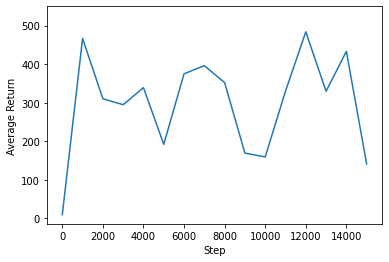

In [11]:
#@test {"skip": true}

steps = range(0, num_iterations + 1, eval_interval)
plt.plot(steps, returns)
plt.ylabel('Average Return')
plt.xlabel('Step')
plt.ylim(top=550)

### Videos

It is helpful to visualize the performance of an agent by rendering the environment at each step. Before we do that, let us first create a function to embed videos in this colab.

In [12]:
def embed_mp4(filename):
  """Embeds an mp4 file in the notebook."""
  video = open(filename,'rb').read()
  b64 = base64.b64encode(video)
  tag = '''
  <video width="640" height="480" controls>
    <source src="data:video/mp4;base64,{0}" type="video/mp4">
  Your browser does not support the video tag.
  </video>'''.format(b64.decode())

  return IPython.display.HTML(tag)

The following code visualizes the agent's policy for a few episodes:

In [13]:
num_episodes = 3
video_filename = 'imageio.mp4'
with imageio.get_writer(video_filename, fps=60) as video:
  for _ in range(num_episodes):
    time_step = eval_env.reset()
    video.append_data(eval_py_env.render())
    while not time_step.is_last():
      action_step = agent.policy.action(time_step)
      time_step = eval_env.step(action_step.action)
      video.append_data(eval_py_env.render())

embed_mp4(video_filename)

[swscaler @ 0x56191e3c7880] Warning: data is not aligned! This can lead to a speed loss


C51 tends to do slightly better than DQN on CartPole-v1, but the difference between the two agents becomes more and more significant in increasingly complex environments. For example, on the full Atari 2600 benchmark, C51 demonstrates a mean score improvement of 126% over DQN after normalizing with respect to a random agent. Additional improvements can be gained by including n-step updates.

For a deeper dive into the C51 algorithm, see [A Distributional Perspective on Reinforcement Learning (2017)](https://arxiv.org/pdf/1707.06887.pdf).